<a href="https://colab.research.google.com/github/MrckHckr/satellite-health-monitoring/blob/main/notebooks/01_telemetry_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satellite Telemetry Real-Time Monitoring

This notebook simulates real-time monitoring of satellite telemetry
(temperature, vibration, power consumption) for health monitoring
and predictive maintenance.

Subsystems:
- Battery
- Actuators
- Antenna


In [3]:
# Import librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
# Loading telemetry
# 📂 Caricamento del file telemetry.csv in Colab

import pandas as pd

# URL raw del file telemetry.csv su GitHub
url = "https://raw.githubusercontent.com/MrckHckr/satellite-health-monitoring/main/data/raw/telemetry.csv"

# Caricamento del CSV
df = pd.read_csv(url, parse_dates=["timestamp"])

# Controllo dei dati
df.head()




,timestamp,temperature,battery_voltage,vibration,power,subsystem,failed
0,2025-01-01 00:00:00,22.3,28.1,0.02,120,battery,0
1,2025-01-01 01:00:00,22.8,28.0,0.02,119,battery,0
2,2025-01-01 02:00:00,23.5,27.8,0.03,118,battery,0
3,2025-01-01 03:00:00,25.2,27.2,0.05,115,battery,1


In [5]:
# Data quality control (industrial practice)
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        4 non-null      datetime64[ns]
 1   temperature      4 non-null      float64       
 2   battery_voltage  4 non-null      float64       
 3   vibration        4 non-null      float64       
 4   power            4 non-null      int64         
 5   subsystem        4 non-null      object        
 6   failed           4 non-null      int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 356.0+ bytes


,0
timestamp,0
temperature,0
battery_voltage,0
vibration,0
power,0
subsystem,0
failed,0


In [6]:
# Separation by subsystem
battery_df = df[df["subsystem"] == "battery"]
actuator_df = df[df["subsystem"] == "actuator"]
antenna_df = df[df["subsystem"] == "antenna"]


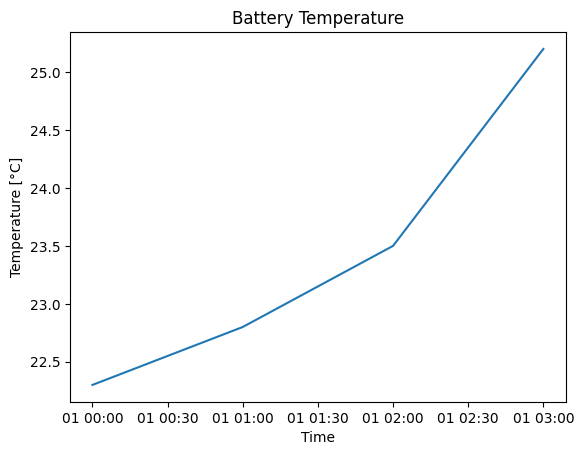

In [7]:
# Telemetry display (monitoring)
# Temperatura
plt.figure()
plt.plot(battery_df["timestamp"], battery_df["temperature"])
plt.title("Battery Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature [°C]")
plt.show()


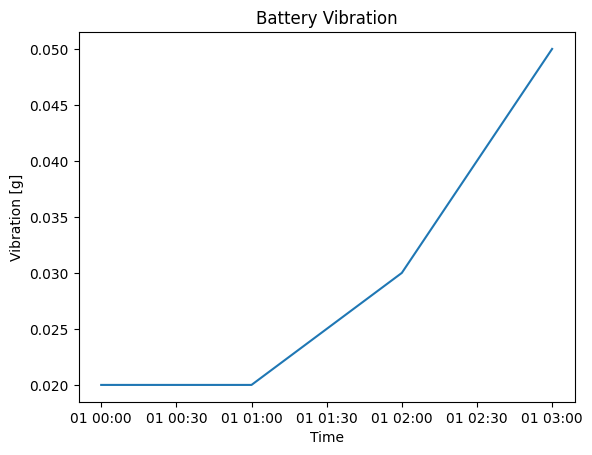

In [8]:
# Vibrazioni
plt.figure()
plt.plot(battery_df["timestamp"], battery_df["vibration"])
plt.title("Battery Vibration")
plt.xlabel("Time")
plt.ylabel("Vibration [g]")
plt.show()


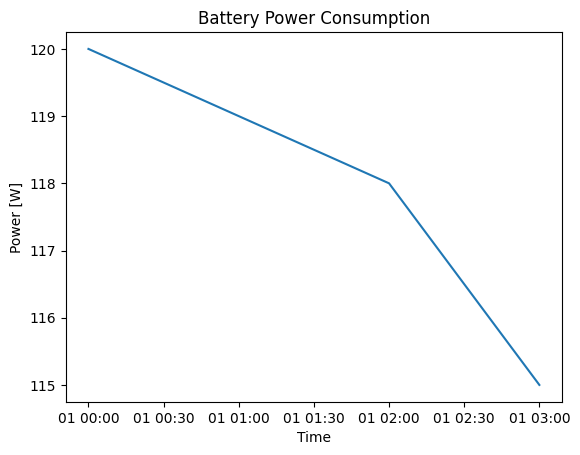

In [9]:
# Consumo energetico
plt.figure()
plt.plot(battery_df["timestamp"], battery_df["power"])
plt.title("Battery Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power [W]")
plt.show()


In [10]:
# REAL-TIME Simulation
print("Starting real-time telemetry stream...\n")

for _, row in battery_df.iterrows():
    print(
        f"Time: {row['timestamp']} | "
        f"T: {row['temperature']} °C | "
        f"Vib: {row['vibration']} g | "
        f"P: {row['power']} W"
    )
    time.sleep(0.5)


Starting real-time telemetry stream...

Time: 2025-01-01 00:00:00 | T: 22.3 °C | Vib: 0.02 g | P: 120 W
Time: 2025-01-01 01:00:00 | T: 22.8 °C | Vib: 0.02 g | P: 119 W
Time: 2025-01-01 02:00:00 | T: 23.5 °C | Vib: 0.03 g | P: 118 W
Time: 2025-01-01 03:00:00 | T: 25.2 °C | Vib: 0.05 g | P: 115 W


## Why real-time telemetry monitoring matters

- Early detection of abnormal behavior
- Reduced operational risk
- Input for anomaly detection models
- Input for LSTM-based failure prediction
